In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import sys
import os
import pandas as pd
import numpy as np
sys.path.append('../../')
import utils
import matplotlib.pyplot as plt

In [2]:
FILENAME = "cal_1"
NANO_FILENAME = "./" + FILENAME + ".csv"
TELEMETRY_FILENAME = "./" + FILENAME + "_telemetry.txt"

In [3]:
nano_df = pd.read_csv(NANO_FILENAME, names=["drop", "drop", "time", 
                                            "Fx", "Fy", "Fz",
                                            "Mx", "My", "Mz",
                                            "Ax", "Ay", "Az"])

In [4]:
nano_df.drop(nano_df.columns[[0,1,9,10,11]], axis=1, inplace=True)

In [5]:
nano_df.head(10)

,time,Fx,Fy,Fz,Mx,My,Mz
0,0.0000,0.000059,0.003730,-0.005284,-0.015040,-0.069441,0.067460
1,0.0001,0.000069,0.003768,-0.005235,-0.015478,-0.068773,0.067400
2,0.0002,0.000079,0.003806,-0.005185,-0.015906,-0.068083,0.067331
3,0.0003,0.000088,0.003844,-0.005134,-0.016323,-0.067374,0.067254
4,0.0004,0.000098,0.003881,-0.005081,-0.016729,-0.066644,0.067167
5,0.0005,0.000108,0.003917,-0.005027,-0.017124,-0.065896,0.067071
6,0.0006,0.000117,0.003954,-0.004972,-0.017508,-0.065128,0.066966
7,0.0007,0.000126,0.003989,-0.004916,-0.017880,-0.064343,0.066852
8,0.0008,0.000136,0.004024,-0.004858,-0.018240,-0.063539,0.066729
9,0.0009,0.000145,0.004058,-0.004800,-0.018588,-0.062719,0.066596


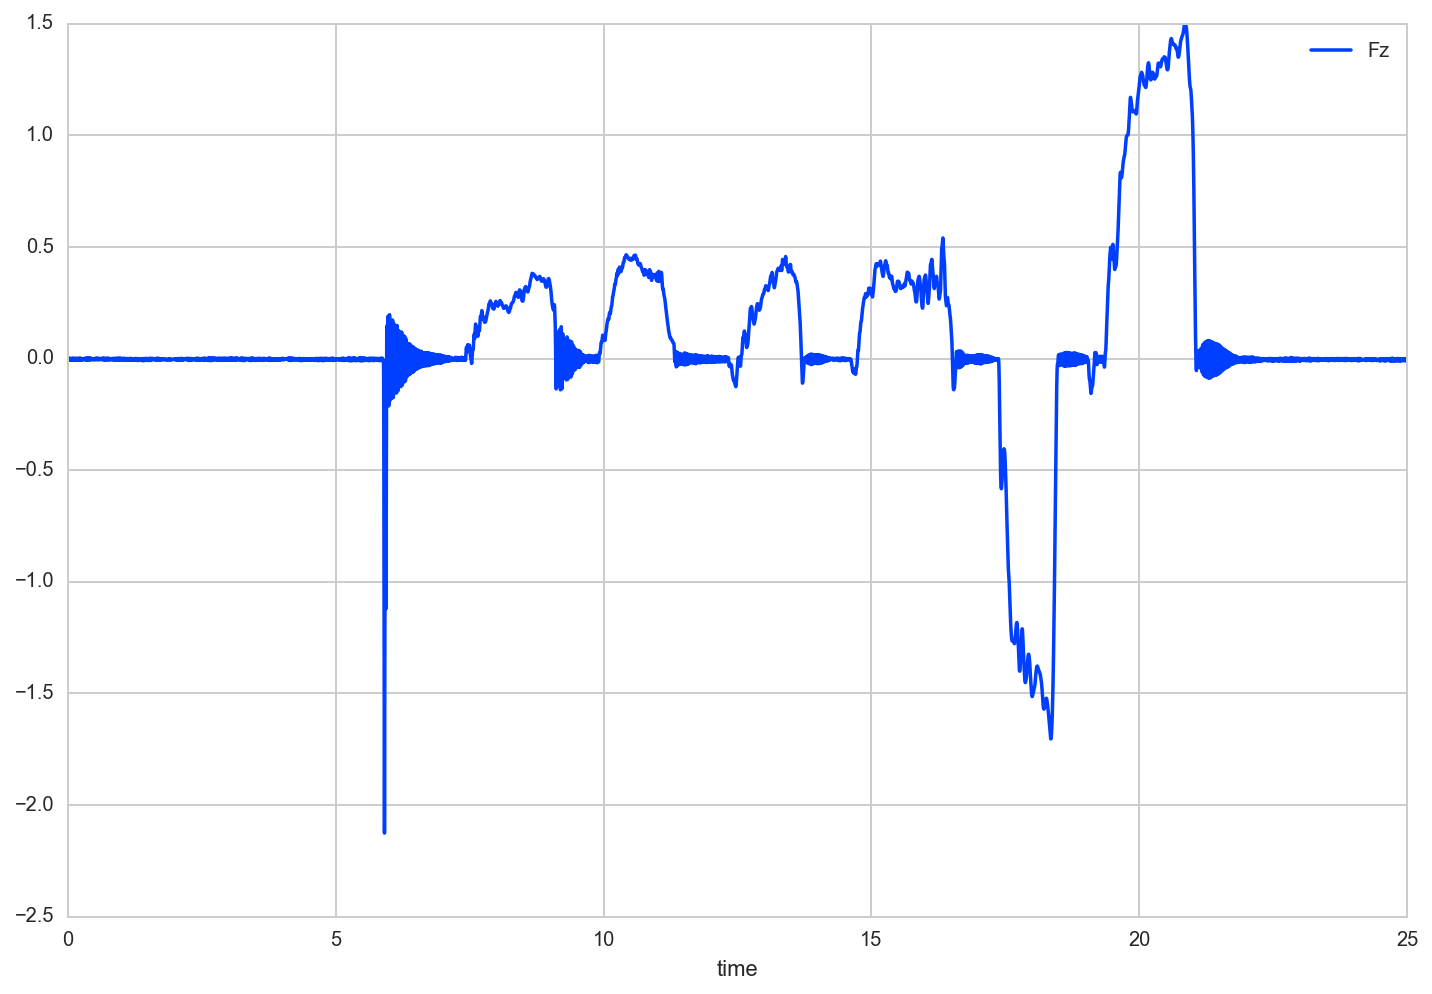

In [6]:
nano_df.plot(x="time", y="Fz", xlim=(0, 25), figsize=(12,8))
# plt.plot(nano_df["time"], nano_df["Fz"].apply(lambda x: abs(x) > 0.1))
plt.xlim((0, 25))
plt.show()

In [7]:
maxindex = nano_df["Fz"].apply(abs).argmax(axis=0)
print "flick index: " + str(maxindex)
print "flick force registered by nano sensor: " + str(nano_df["Fz"][maxindex])

flick index: 59096
flick force registered by nano sensor: -2.125844


In [8]:
telem_csv = utils.write_data_file_to_csv(TELEMETRY_FILENAME)
tdf = pd.read_csv(telem_csv)

In [9]:
drop_cols = list(range(1,16))
tdf.drop(tdf.columns[drop_cols], axis=1, inplace=True)

In [10]:
tdf.head(10)

,time,S1,S2,S3,S4,S5,S6,S7,S8
0,752,1801,1861,2088,2299,2057,1840,1862,1988
1,1753,1801,1861,2088,2299,2057,1840,1862,1988
2,2754,1801,1861,2088,2299,2057,1840,1862,1988
3,3755,1801,1861,2088,2299,2057,1840,1862,1988
4,4756,1803,1864,2089,2301,2057,1842,1862,1989
5,5757,1803,1864,2089,2301,2057,1842,1862,1989
6,6758,1803,1864,2089,2301,2057,1842,1862,1989
7,7759,1803,1864,2089,2301,2057,1842,1862,1989
8,8760,1803,1864,2089,2301,2057,1842,1862,1989
9,9761,1801,1862,2088,2298,2057,1840,1860,1987


In [11]:
FLICK_NANO_INDEX = 59096
FLICK_SHELL_INDEX = 2038

In [12]:
nano_df = nano_df[FLICK_NANO_INDEX:]
nano_df.shape

(342904, 7)

In [13]:
tdf = tdf[FLICK_SHELL_INDEX:]
tdf.shape

(18357, 9)

In [14]:
nano_df.head(10)

,time,Fx,Fy,Fz,Mx,My,Mz
59096,5.9096,-0.063111,-0.150521,-2.125844,-10.207934,-30.007391,3.218713
59097,5.9097,-0.064879,-0.149107,-2.125783,-10.244874,-30.157650,3.192266
59098,5.9098,-0.066651,-0.147617,-2.125274,-10.281294,-30.303628,3.164407
59099,5.9099,-0.068427,-0.146049,-2.124318,-10.317222,-30.445283,3.135132
59100,5.9100,-0.070207,-0.144404,-2.122914,-10.352687,-30.582577,3.104437
59101,5.9101,-0.071991,-0.142680,-2.121064,-10.387718,-30.715472,3.072321
59102,5.9102,-0.073778,-0.140878,-2.118768,-10.422346,-30.843933,3.038781
59103,5.9103,-0.075568,-0.138996,-2.116027,-10.456603,-30.967926,3.003816
59104,5.9104,-0.077360,-0.137035,-2.112841,-10.490520,-31.087419,2.967425
59105,5.9105,-0.079154,-0.134994,-2.109214,-10.524130,-31.202385,2.929608


In [15]:
tdf.head(2)

,time,S1,S2,S3,S4,S5,S6,S7,S8
2038,2041791,1789,1780,1958,2165,1808,1613,1676,1781
2039,2042792,1609,1731,1851,1970,1869,1635,1758,1984


In [16]:
nano_df["Fx"][:10]

59096   -0.063111
59097   -0.064879
59098   -0.066651
59099   -0.068427
59100   -0.070207
59101   -0.071991
59102   -0.073778
59103   -0.075568
59104   -0.077360
59105   -0.079154
Name: Fx, dtype: float64

In [17]:
# nano_df.groupby(np.arange(len(nano_df))//10)
# for k,g in nano_df.groupby(np.arange(len(nano_df))//10):
#     print (k,g)

In [18]:
batch = nano_df.groupby(np.arange(len(nano_df))//10)

In [19]:
len(batch)

34291

In [ ]:
chunk_np = chunk.as_matrix(columns=["Fx","Fy","Fz","Mx","My","Mz"])
chunk_np[0,:]

In [ ]:
chunk.mean(axis=0).as_matrix(columns=["Fx","Fy","Fz","Mx","My","Mz"])

In [ ]:
S = tdf.as_matrix(columns=["S1", "S2", "S3", "S4", "S5", "S6", "S7", "S8"])

In [ ]:
S